## Problem Statement: Reduce the dimensions of the given dataset using PCA 


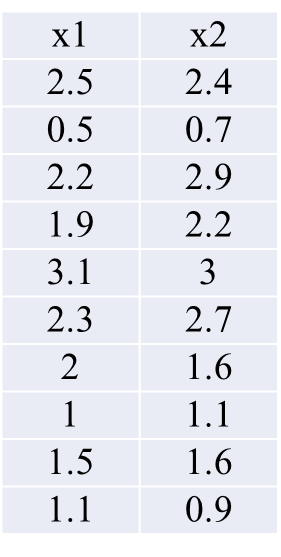

In [1]:
#Importing required libraries
import numpy as np

In [2]:
X=np.array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3],
       [2.3, 2.7],
       [2, 1.6],
       [1, 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])
X

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [6]:
X.shape

(10, 2)

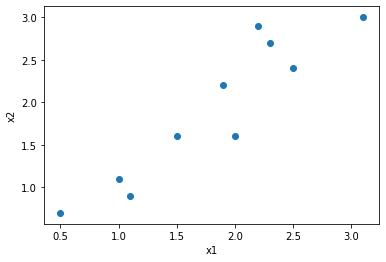

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Steps for dimensionality reduction using Principal Component Analysis(PCA)

1. Standardize the data

2. Compute the covariance matrix

3. Calculate the eigenvectors and eigenvalues

4. Sort eigenvalues in descending order and compute the Principal Components

5. Reduce the dimensions of the data set

### Step 1. Standardize the data

In [7]:
# mean  
xbar=X.mean(axis=0)
xbar

array([1.81, 1.91])

In [8]:
sigma=np.std(X,axis=0,ddof=1) #ddof=1 divides by N-1 for std
sigma

array([0.78521052, 0.84649605])

In [9]:
# So the standard data is

Z=(X-xbar)/sigma
Z

array([[ 0.87874523,  0.57885681],
       [-1.6683424 , -1.42942192],
       [ 0.49668209,  1.16952702],
       [ 0.11461894,  0.34258872],
       [ 1.64287153,  1.28766107],
       [ 0.62403647,  0.93325894],
       [ 0.24197333, -0.36621553],
       [-1.03157049, -0.95688575],
       [-0.39479858, -0.36621553],
       [-0.90421611, -1.19315383]])

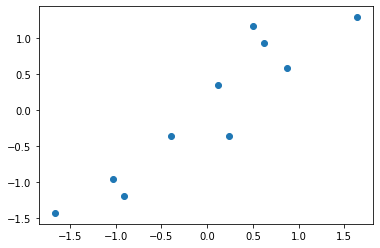

In [10]:
plt.scatter(Z[:,0], Z[:,1])
plt.show()

In [11]:
np.round(Z.mean(axis=0),2)

array([-0.,  0.])

In [12]:
Z.std(axis=0,ddof=1)

array([1., 1.])

### Step 2. Compute the covariance matrix

In [17]:
cov_mat = np.cov(X,rowvar = False) #If rowvar is True (default), then each row represents a variable,with observations in the columns.
#Otherwise, the relationship is transposed: each column represents a variable,while the rows contain observations.

cov_mat

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

### Step 3. Calculate the eigenvectors and eigenvalues

In [14]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [18]:
eigen_values

array([0.0490834 , 1.28402771])

In [19]:
eigen_vectors

array([[-0.73517866,  0.6778734 ],
       [ 0.6778734 ,  0.73517866]])

### Step 4. Sort eigenvalues in descending order and compute the Principal Components

In [20]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_index 

array([1, 0], dtype=int64)

In [21]:
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
sorted_eigenvectors

array([[ 0.6778734 , -0.73517866],
       [ 0.73517866,  0.6778734 ]])

In [22]:
100*eigen_values[1]/sum(eigen_values)

96.31813143486458

In [23]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 1 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
eigenvector_subset

array([[0.6778734 ],
       [0.73517866]])

### Step 5. Reduce the dimensions of the data set

In [24]:
#Transform the data 
transformed=np.matmul(X,eigenvector_subset)
transformed

array([[3.45911227],
       [0.85356176],
       [3.62333958],
       [2.9053525 ],
       [4.3069435 ],
       [3.54409119],
       [2.53203265],
       [1.48656992],
       [2.19309595],
       [1.40732153]])

### Let's reconstruct the original data and verify

In [25]:
#reconstruct the original data and verify
y=np.matmul(transformed,eigenvector_subset.transpose())
y

array([[2.34484019, 2.54306551],
       [0.57860681, 0.62752039],
       [2.45616551, 2.66380192],
       [1.96946117, 2.13595314],
       [2.91956243, 3.16637293],
       [2.40244514, 2.60554019],
       [1.71639757, 1.86149636],
       [1.0077062 , 1.09289447],
       [1.4866414 , 1.61231733],
       [0.95398583, 1.03463275]])

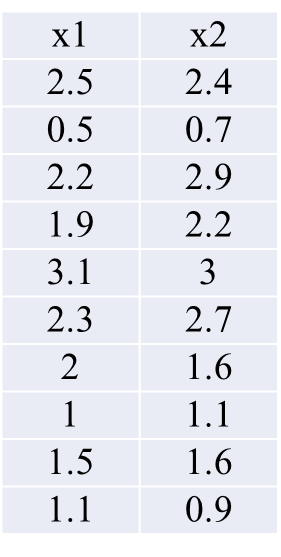

In [ ]:
transformed=np.matmul(X-xbar,eigenvector_subset)
transformed

In [ ]:
#reconstruct the original data and verify
y=np.matmul(transformed,eigenvector_subset.transpose())
y

In [ ]:
y1=y+ np.mean(X , axis = 0)
y1